# Bean image preprocessing
**By: H. Achicanoy**
**2018**

In [1]:
# Load libraries
import os
import cv2
import glob
import numpy as np
from matplotlib import pyplot as plt

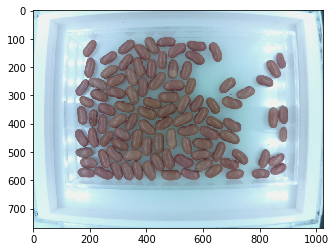

In [8]:
# Function: grep
def grep(l, s):
    return [i for i in l if s in i]

# Read images and convert them to RGB format
root = '/Users/haachicanoy/Documents/Data/Computer_vision/clear_bckg/_img_orgnl/18ACA03037_000'
img_list = os.listdir(root)
img_list = grep(img_list, '_color.jpg')

bgr_imgs = [cv2.imread(file) for file in glob.glob(root + "/*_color.jpg")]
rgb_imgs = bgr_imgs

for i in range(0, len(rgb_imgs)):
    rgb_imgs[i] = cv2.cvtColor(rgb_imgs[i], cv2.COLOR_BGR2RGB)

#f, axarr = plt.subplots(4, 2, squeeze = True)
#axarr[0,0].imshow(rgb_imgs[0])
#axarr[0,1].imshow(rgb_imgs[1])
#axarr[1,0].imshow(rgb_imgs[2])
#axarr[1,1].imshow(rgb_imgs[3])
#axarr[2,0].imshow(rgb_imgs[4])
#axarr[2,1].imshow(rgb_imgs[5])
#axarr[3,0].imshow(rgb_imgs[6])
#f.delaxes(axarr[3][1])
#plt.show()

plt.imshow(rgb_imgs[0])
plt.show()

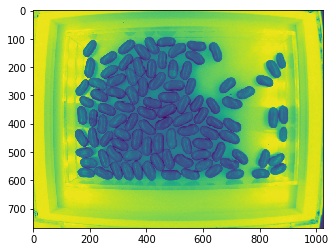

In [9]:
# Gray conversion of the images
gray_imgs = bgr_imgs

for i in range(0, len(rgb_imgs)):
    gray_imgs[i] = cv2.cvtColor(bgr_imgs[i], cv2.COLOR_BGR2GRAY)

#f, axarr = plt.subplots(4, 2, squeeze = True)
#axarr[0,0].imshow(gray_imgs[0])
#axarr[0,1].imshow(gray_imgs[1])
#axarr[1,0].imshow(gray_imgs[2])
#axarr[1,1].imshow(gray_imgs[3])
#axarr[2,0].imshow(gray_imgs[4])
#axarr[2,1].imshow(gray_imgs[5])
#axarr[3,0].imshow(gray_imgs[6])
#f.delaxes(axarr[3][1])
#plt.show()

plt.imshow(gray_imgs[0])
plt.show()

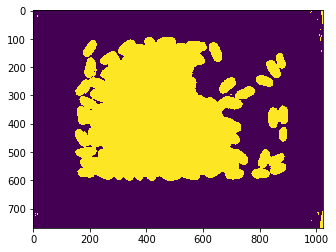

In [10]:
# Thresholding of the images
# It is important to try with different thresholding algorithms

thrs_imgs = gray_imgs

for i in range(0, len(rgb_imgs)):
    ret, thrs_imgs[i] = cv2.threshold(gray_imgs[i],0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

#f, axarr = plt.subplots(4, 2, squeeze = True)
#axarr[0,0].imshow(thrs_imgs[0])
#axarr[0,1].imshow(thrs_imgs[1])
#axarr[1,0].imshow(thrs_imgs[2])
#axarr[1,1].imshow(thrs_imgs[3])
#axarr[2,0].imshow(thrs_imgs[4])
#axarr[2,1].imshow(thrs_imgs[5])
#axarr[3,0].imshow(thrs_imgs[6])
#f.delaxes(axarr[3][1])
#plt.show()

plt.imshow(thrs_imgs[0])
plt.show()

In [46]:
# Noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations = 3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

In [47]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

In [48]:
markers = cv2.watershed(img, markers)
img[markers == -1] = [255,0,0]

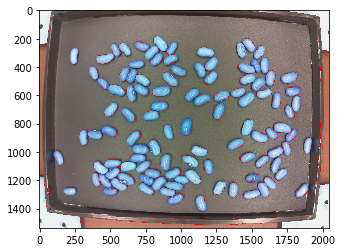

In [50]:
plt.imshow(img)
plt.show()